# Logistic Regression Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

/Users/fidaalibaig/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### We will use something called as an Iris dataset, which is a dataset of 3 flowers, but for our problem we will only take 2 classes of them.

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

#### Let us try to plot and see how our data lies. Whether can it be separated using a decision boundary.

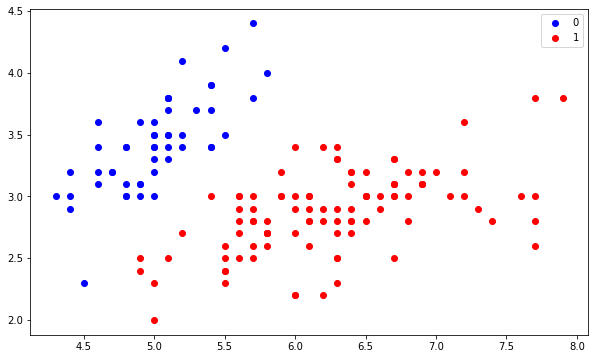

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

# Implementing Logistic Regression from Scikit-Learn

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

#### It also has the same method as fit to train the model

In [12]:
model.fit(X, y)


LogisticRegression(random_state=0, solver='liblinear')

#### Let us try to predict, and check the value of its prediction.

In [13]:
model.predict_proba(X)

array([[8.90851839e-01, 1.09148161e-01],
       [6.45187510e-01, 3.54812490e-01],
       [8.69400222e-01, 1.30599778e-01],
       [8.51288377e-01, 1.48711623e-01],
       [9.39818917e-01, 6.01810828e-02],
       [9.50364297e-01, 4.96357033e-02],
       [9.49998814e-01, 5.00011855e-02],
       [8.75288203e-01, 1.24711797e-01],
       [8.08902352e-01, 1.91097648e-01],
       [7.30634124e-01, 2.69365876e-01],
       [8.95888506e-01, 1.04111494e-01],
       [9.20303724e-01, 7.96962761e-02],
       [6.99920244e-01, 3.00079756e-01],
       [8.90098824e-01, 1.09901176e-01],
       [9.13422567e-01, 8.65774329e-02],
       [9.85294062e-01, 1.47059381e-02],
       [9.50364297e-01, 4.96357033e-02],
       [8.90851839e-01, 1.09148161e-01],
       [8.58798284e-01, 1.41201716e-01],
       [9.64399433e-01, 3.56005674e-02],
       [7.21654128e-01, 2.78345872e-01],
       [9.47809512e-01, 5.21904883e-02],
       [9.76891959e-01, 2.31080409e-02],
       [7.85782889e-01, 2.14217111e-01],
       [9.203037

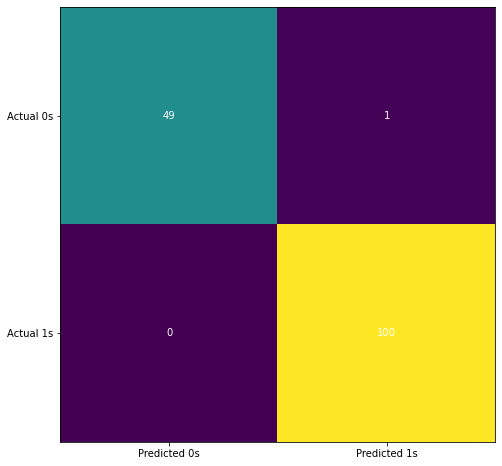

In [14]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [15]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      1.00       100

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



#### The code is reference from this phenominal github page : https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb
